In [ ]:
###imports from our modules
from preprocessing import (
    extract_email_fields,
    clean_email_text,
    split_email_chain,
    nltk_preprocess,
    final_email_filter
)
from features import (
    extract_tfidf_features,
    get_top_tfidf_terms
)
from summarization import (
    split_sentences,
    fit_vectorizer,
    is_valid_sentence,
    summarize_email,
    summarize_abstractive
)
from gui import run_email_summarizer_gui

[nltk_data] Downloading package punkt to C:\Users\Sulaiman
[nltk_data]     Abukakar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sulaiman
[nltk_data]     Abukakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sulaiman
[nltk_data]     Abukakar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=49) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_c

In [ ]:
###standard libraries and downloads
import pandas as pd #used for handling tabular data
import re #regex library used for text pattern matching
import html #used for processing unescapes html entities
import nltk #this is the natural language toolkit used for tokenization, stemming etc.
import numpy as np #used for numerical operations
import matplotlib.pyplot as plt
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from rouge_utils import compute_rouge_scores, compute_rouge_for_dataframe
!pip install transformers
!conda install pytorch torchvision torchaudio cpuonly -c pytorch -y
from transformers import pipeline

[nltk_data] Downloading package punkt to C:\Users\Sulaiman
[nltk_data]     Abukakar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sulaiman
[nltk_data]     Abukakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sulaiman
[nltk_data]     Abukakar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Channels:
 - pytorch
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



## Data Loading and Exploration
- Import and load most of our essential libraries 
- Download neccessary resources like the NLTK and install libraries- Transformers and Pytorch for deep learning
- Load our main dataset and do a quick inspection of our dataset(.head, .tail, .info, .describe)
- Finally display the content of our email after removing column width to get a better look at our data
- Again loading a subset of our dataset (2000 rows) and then using .head to get more insights

In [ ]:
df = pd.read_csv("main_enron_emails.csv")

In [ ]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n"
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: leah.arsdall@enron.com\nSubject: Re: test\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Leah Van Arsdall\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\ntest successful. way to go!!!"
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: randall.gay@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Randall L Gay\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nRandy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group. Plus your thoughts on any changes that need to be made. \n(Patti S for example)\n\nPhillip"
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLet's shoot for Tuesday at 11:45."


In [ ]:
df.tail()

file  \
517396  zufferli-j/sent_items/95.   
517397  zufferli-j/sent_items/96.   
517398  zufferli-j/sent_items/97.   
517399  zufferli-j/sent_items/98.   
517400  zufferli-j/sent_items/99.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
df.describe()

,file,message
count,517401,517401
unique,517401,517401
top,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n"
freq,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [ ]:
pd.set_option("display.max_colwidth", None)
df.loc[1]

file                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Insights we from this exploration
- Our dataset has no missing values so at this point there's no need to drop or fill columns
- No need to look for outliers and skewness because all the data in our dataset are objects
- From the final loc we can see a bit more into the nature of our message- message id, date, from, to, subject, body.

## Data Exploration
- We created a function to extract structured fields using the re library from our raw email text
- We then applied it to our df_subset to create a new dataframe with structured fields rather than raw text
- We redefined our df_subset to be a merged dataset of our original data dn extracted data
- We then preview a few columns from the dataset

In [ ]:
###loading subset of 2000 rows for faster processing
df_subset = pd.read_csv("main_enron_emails.csv", encoding="utf-8", nrows=2000)

In [ ]:
pd.set_option("display.max_colwidth", None)
df_subset.head()

,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n"
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: leah.arsdall@enron.com\nSubject: Re: test\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Leah Van Arsdall\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\ntest successful. way to go!!!"
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: randall.gay@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Randall L Gay\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nRandy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group. Plus your thoughts on any changes that need to be made. \n(Patti S for example)\n\nPhillip"
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLet's shoot for Tuesday at 11:45."


In [ ]:
###creating new column email fielsd by applying our extract function on the column message
email_fields = df_subset["message"].apply(extract_email_fields)

In [ ]:
###joining the new formed column to our dataframe
df_subset = pd.concat([df_subset, email_fields], axis=1)

In [ ]:
###preview
print(df_subset.columns) 
df_subset[["from", "to", "subject", "body"]].head(5)

Index(['file', 'message', 'message_id', 'date', 'from', 'to', 'subject',
       'body'],
      dtype='object')


,from,to,subject,body
0,phillip.allen@enron.com,tim.belden@enron.com,Mime-Version: 1.0,Here is our forecast
1,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time."
2,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,test successful. way to go!!!
3,phillip.allen@enron.com,randall.gay@enron.com,Mime-Version: 1.0,"Randy,\n\n Can you send me a schedule of the salary and level of everyone in the \nscheduling group. Plus your thoughts on any changes that need to be made. \n(Patti S for example)\n\nPhillip"
4,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.


In [ ]:
###remove duplicates
if df_subset.duplicated().any():
    df_subset = df_subset.drop_duplicates()
df_subset = df_subset.drop_duplicates().reset_index(drop=True)

### Insights 
- From the preview, particularly the body column(which is our main focus), we can see that some rows(in our body) have some things(\n, mass of random email, etc).

## Data Cleaning
- We made a function to clean our data(removing thing like HTML entries and tags, file references, substituting things with placeholders, removing long headed and other things)
- Since our main business lies with the body of our email, we are making a new column by applying our cleaning function through the body column of our df_subset
- Some emails arent single messages, rather they are full threads with replies stacked inside a big block.
- Therefore we made a split function to detect thread markers 
- We applied this to a sample of 200 email to work faster while debugging
- We made a big filtering function to make sure our emails have a certain number of characters, alphabet, placeholder, symbol ratio, reply parts count, sentence structure and word count

In [ ]:
###cleaning
df_subset["cleaned_text"] = df_subset["body"].apply(clean_email_text)
print(df_subset["cleaned_text"].iloc[0])

Here is our forecast


In [ ]:
df_subset["cleaned_text"].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Here is our forecast
1    Traveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal busine

In [ ]:
df_subset.head()
print(df_subset.columns)

Index(['file', 'message', 'message_id', 'date', 'from', 'to', 'subject',
       'body', 'cleaned_text'],
      dtype='object')


In [ ]:
sample_df = df_subset.sample(n=1000, random_state=42).copy()
sample_df["email_parts"] = sample_df["cleaned_text"].apply(split_email_chain)
sample_df.head(5)

file  \
1860  allen-p/discussion_threads/468.   
353           allen-p/_sent_mail/420.   
1333       allen-p/deleted_items/195.   
905        allen-p/all_documents/377.   
1289       allen-p/deleted_items/153.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
print(sample_df.shape)

(1000, 10)


In [ ]:
print(sample_df["cleaned_text"].isna().sum())

0


In [ ]:
print(sample_df["cleaned_text"].head(10))

1860                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
###filtering
sample_df = final_email_filter(sample_df)
sample_df.head(3)

After length filter: 814
After word count filter: 691
After alpha ratio filter: 683
After placeholder ratio filter: 683
After symbol ratio filter: 669
After sentence punctuation filter: 663
After email parts count filter: 663


file  \
0  allen-p/deleted_items/195.   
1  allen-p/all_documents/377.   
2  allen-p/deleted_items/153.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Conclusion
- We have now cleaned our data enough to go through summarization without any problem and confusing our model.

## Feature Exploration
- We initialized and generated our scores and tokens
- We carried an intial extraction of TF-IDF features from the sample of our dataset to get insights
- After a editing our pre processing function, we generate a function that loop through the rows in our dataframe and gets the top idf scores and tokens
- Also we trained our tf idf matrix on other pre processed text for better extraction during our summary

In [ ]:
###preprocessing for features
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r"\w+")

In [ ]:
sample_df["nltk_processed_text"] = sample_df["cleaned_text"].apply(nltk_preprocess)
sample_df.head(1)

,file,message,message_id,date,from,to,subject,body,cleaned_text,email_parts,nltk_processed_text
0,allen-p/deleted_items/195.,"Message-ID: <5558637.1075858635446.JavaMail.evans@thyme>\nDate: Wed, 24 Oct 2001 17:30:02 -0700 (PDT)\nFrom: arsystem@mailman.enron.com\nTo: k..allen@enron.com\nSubject: Your Approval is Overdue: Access Request for matt.smith@enron.com\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: ARSystem <ARSystem@mailman.enron.com>@ENRON\nX-To: Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=PALLEN>\nX-cc: \nX-bcc: \nX-Folder: \PALLEN (Non-Privileged)\Allen, Phillip K.\Deleted Items\nX-Origin: Allen-P\nX-FileName: PALLEN (Non-Privileged).pst\n\nThis request has been pending your approval for 10 days. Please click http://itcapps.corp.enron.com/srrs/auth/emailLink.asp?ID=000000000067320&Page=Approval to review and act upon this request.\n\n\n\n\n\nRequest ID : 000000000067320\nRequest Create Date : 10/11/01 10:24:53 AM\nRequested For : matt.smith@enron.com\nResource Name : Risk Acceptance Forms Local Admin Rights - Permanent\nResource Type : Applications\n\n\n\n",5558637.1075858635446.JavaMail.evans@thyme,"Wed, 24 Oct 2001 17:30:02 -0700 (PDT)",arsystem@mailman.enron.com,k..allen@enron.com,Your Approval is Overdue: Access Request for matt.smith@enron.com,This request has been pending your approval for 10 days. Please click http://itcapps.corp.enron.com/srrs/auth/emailLink.asp?ID=000000000067320&Page=Approval to review and act upon this request.\n\n\n\n\n\nRequest ID : 000000000067320\nRequest Create Date : 10/11/01 10:24:53 AM\nRequested For : matt.smith@enron.com\nResource Name : Risk Acceptance Forms Local Admin Rights - Permanent\nResource Type : Applications,This request has been pending your approval for 10 days. Please click [LINK] to review and act upon this request. Request ID : [PHONE]67320 Request Create Date : 10/11/01 10:24:53 AM Requested For : [EMAIL] Resource Name : Risk Acceptance Forms Local Admin Rights - Permanent Resource Type : Applications,[This request has been pending your approval for 10 days. Please click [LINK] to review and act upon this request. Request ID : [PHONE]67320 Request Create Date : 10/11/01 10:24:53 AM Requested For : [EMAIL] Resource Name : Risk Acceptance Forms Local Admin Rights - Permanent Resource Type : Applications],request pending approval day please click link review act upon request request id phone request create date requested email resource name risk acceptance form local admin right permanent resource type application


In [ ]:
###initialising
vectorizer = fit_vectorizer(sample_df["nltk_processed_text"])
tfidf_matrix = vectorizer.transform(sample_df["nltk_processed_text"])

In [ ]:
###TF IDF feature extraction
feature_names = vectorizer.get_feature_names_out()
row = tfidf_matrix[0].toarray().flatten()
try:
    top_n = 10
    top_indices = row.argsort()[::-1][:top_n]
    print("\nTop terms in first email:")
    for idx in top_indices:
        print(f"{feature_names[idx]}: {row[idx]:.4f}")
except Exception as e:
    print(f"Error during extractive summarization: {e}")


Top terms in first email:
request: 0.5991
resource: 0.3093
admin: 0.1964
pending: 0.1881
acceptance: 0.1846
permanent: 0.1753
act: 0.1739
local: 0.1739
approval: 0.1643
upon: 0.1602


In [ ]:
top_terms_list = []
for i in range(tfidf_matrix.shape[0]):
    top_terms = get_top_tfidf_terms(tfidf_matrix[i], feature_names)
    top_terms_list.append(top_terms)
sample_df["top_keywords"] = top_terms_list
sample_df.head(1)

,file,message,message_id,date,from,to,subject,body,cleaned_text,email_parts,nltk_processed_text,top_keywords
0,allen-p/deleted_items/195.,"Message-ID: <5558637.1075858635446.JavaMail.evans@thyme>\nDate: Wed, 24 Oct 2001 17:30:02 -0700 (PDT)\nFrom: arsystem@mailman.enron.com\nTo: k..allen@enron.com\nSubject: Your Approval is Overdue: Access Request for matt.smith@enron.com\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: ARSystem <ARSystem@mailman.enron.com>@ENRON\nX-To: Allen, Phillip K. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=PALLEN>\nX-cc: \nX-bcc: \nX-Folder: \PALLEN (Non-Privileged)\Allen, Phillip K.\Deleted Items\nX-Origin: Allen-P\nX-FileName: PALLEN (Non-Privileged).pst\n\nThis request has been pending your approval for 10 days. Please click http://itcapps.corp.enron.com/srrs/auth/emailLink.asp?ID=000000000067320&Page=Approval to review and act upon this request.\n\n\n\n\n\nRequest ID : 000000000067320\nRequest Create Date : 10/11/01 10:24:53 AM\nRequested For : matt.smith@enron.com\nResource Name : Risk Acceptance Forms Local Admin Rights - Permanent\nResource Type : Applications\n\n\n\n",5558637.1075858635446.JavaMail.evans@thyme,"Wed, 24 Oct 2001 17:30:02 -0700 (PDT)",arsystem@mailman.enron.com,k..allen@enron.com,Your Approval is Overdue: Access Request for matt.smith@enron.com,This request has been pending your approval for 10 days. Please click http://itcapps.corp.enron.com/srrs/auth/emailLink.asp?ID=000000000067320&Page=Approval to review and act upon this request.\n\n\n\n\n\nRequest ID : 000000000067320\nRequest Create Date : 10/11/01 10:24:53 AM\nRequested For : matt.smith@enron.com\nResource Name : Risk Acceptance Forms Local Admin Rights - Permanent\nResource Type : Applications,This request has been pending your approval for 10 days. Please click [LINK] to review and act upon this request. Request ID : [PHONE]67320 Request Create Date : 10/11/01 10:24:53 AM Requested For : [EMAIL] Resource Name : Risk Acceptance Forms Local Admin Rights - Permanent Resource Type : Applications,[This request has been pending your approval for 10 days. Please click [LINK] to review and act upon this request. Request ID : [PHONE]67320 Request Create Date : 10/11/01 10:24:53 AM Requested For : [EMAIL] Resource Name : Risk Acceptance Forms Local Admin Rights - Permanent Resource Type : Applications],request pending approval day please click link review act upon request request id phone request create date requested email resource name risk acceptance form local admin right permanent resource type application,"[request, resource, admin, pending, acceptance, permanent, act, local, approval, upon]"


### Insights(Particulaly from the features names)
- A suprisingly large amount of top ranked features were numeric code and timestamp fragments(000, 03pm, 10457)
- This bit of feature extraction shows us that we could further refine our cleaning by removing low value numeric patterns(we went back to our nlkt main preprocessing function)
- Although we arent really training a model this bit helped us to like evaluate the effectiveness of our cleaning and also the noise left in our dataset
- Final note(after impleting a numeric filter), decided to leave the ones that had passed because they might hold semantic value in some context

In [ ]:
###extractive summary
sample_df_subset = sample_df.head(500).copy()
sample_df_subset["extractive_summary"] = sample_df_subset["cleaned_text"].apply(lambda x: summarize_email(x, vectorizer, top_n=3))

In [ ]:
from IPython.display import display
display(sample_df_subset[["file", "extractive_summary"]].head())

,file,extractive_summary
0,allen-p/deleted_items/195.,This request has been pending your approval for 10 days. Request ID : [PHONE]67320 Request Create Date : 10/11/01 10:24:53 AM Requested For : [EMAIL] Resource Name : Risk Acceptance Forms Local Admin Rights - Permanent Resource Type : Applications Please click [LINK] to review and act upon this request.
1,allen-p/all_documents/377.,"(Desktop, Laptop, Both) Do you have a PDA? Do you have any Distribution Groups that Messaging maintains for you (for mass mailings)? Do you have access to a shared calendar?"
2,allen-p/deleted_items/153.,"Simpkins Winstead Sechrest & Minick P.C. I am coordinating with the Lender regarding the reimbursement provisions in the event Agape fails to receive reimbursement from Ryland. We may do a separate agreement between you, AMHP and McCall in the event Agape fails to receive reimbursement."
3,allen-p/deleted_items/137.,Winning tickets will be drawn at 2:00 p.m. JDRF Raffle - Raffle tickets for two roundtrip Continental Airline tickets for $5.00 each. This event will be a blast.
4,allen-p/discussion_threads/226.,


In [ ]:
sample_df = sample_df.head(200).copy()
sample_df["summary"] = sample_df["cleaned_text"].apply(lambda x: summarize_email(x, vectorizer))

In [ ]:
print(sample_df[["file", "summary"]].head())

                              file  \
0       allen-p/deleted_items/195.   
1       allen-p/all_documents/377.   
2       allen-p/deleted_items/153.   
3       allen-p/deleted_items/137.   
4  allen-p/discussion_threads/226.   

                                                                                                                                                                                                                                                                                                            summary  
0  This request has been pending your approval for 10 days. Request ID : [PHONE]67320 Request Create Date : 10/11/01 10:24:53 AM Requested For : [EMAIL] Resource Name : Risk Acceptance Forms Local Admin Rights - Permanent Resource Type : Applications Please click [LINK] to review and act upon this request.  
1                                                                                                                                     (Desktop, Laptop,

In [ ]:
display(sample_df[["cleaned_text", "summary"]].head())
sample_df[["message", "cleaned_text", "summary"]].to_csv("email_summaries_sample.csv", index=False)

cleaned_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
summarizer = pipeline("summarization", model="Falconsai/text_summarization")

Device set to use cpu


In [ ]:
# sample_df["extractive_summary"] = sample_df["cleaned_text"].apply(lambda x: summarize_email(x, vectorizer))
# sample_df["abstractive_summary"] = sample_df["extractive_summary"].apply(summarize_abstractive)

In [ ]:
sample_df["extractive_summary"] = sample_df["cleaned_text"].apply(lambda x: summarize_email(x, vectorizer))
sample_df["abstractive_summary"] = sample_df["extractive_summary"].apply(summarize_abstractive)

# Now take the subset
sample_df_subset = sample_df.sample(n=10, random_state=42)

Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=18) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=27) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=16) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

In [ ]:
sample_df_subset = sample_df.sample(n=10, random_state=42)

In [ ]:
sample_df.head()

file  \
0       allen-p/deleted_items/195.   
1       allen-p/all_documents/377.   
2       allen-p/deleted_items/153.   
3       allen-p/deleted_items/137.   
4  allen-p/discussion_threads/226.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
if "abstractive_summary" in row:
    abstractive = row["abstractive_summary"]
else:
    print(f"No abstractive_summary found in row {idx}")


No abstractive_summary found in row 8449


In [ ]:
extractive_scores = []
abstractive_scores = []

for idx, row in sample_df_subset.iterrows():
    ref = row["cleaned_text"]
    extractive = row["extractive_summary"]
    abstractive = row["abstractive_summary"]
    
    extractive_scores.append(compute_rouge_scores(ref, extractive))
    abstractive_scores.append(compute_rouge_scores(ref, abstractive))


In [ ]:
extractive_df = pd.DataFrame(extractive_scores).add_prefix("extractive_")
abstractive_df = pd.DataFrame(abstractive_scores).add_prefix("abstractive_")

evaluated_df = pd.concat([sample_df_subset, extractive_df, abstractive_df], axis=1)
evaluated_df.head()

,file,message,message_id,date,from,to,subject,body,cleaned_text,email_parts,...,top_keywords,summary,extractive_summary,abstractive_summary,extractive_rouge1,extractive_rouge2,extractive_rougeL,abstractive_rouge1,abstractive_rouge2,abstractive_rougeL
95,allen-p/all_documents/623.,"Message-ID: <33197631.1075855699841.JavaMail.evans@thyme>\nDate: Thu, 14 Dec 2000 06:15:00 -0800 (PST)\nFrom: phillip.allen@enron.com\nTo: stagecoachmama@hotmail.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: stagecoachmama@hotmail.com\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_June2001\Notes Folders\All documents\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nLucy,\n\nHere is a new file for 12/15.\n\n\n\n\nFor the rentroll for 12/08 here are my questions:\n\n #23 & #24 did not pay. Just late or moving?\n\n #25 & #33 Both paid 130 on 12/01 and $0 on 12/08. What is the deal?\n\n #11 Looks like she is caught up. When is she due again?\n\n\nPlease email the answers.\n\nPhillip\n",33197631.1075855699841.JavaMail.evans@thyme,"Thu, 14 Dec 2000 06:15:00 -0800 (PST)",phillip.allen@enron.com,stagecoachmama@hotmail.com,Mime-Version: 1.0,"Lucy,\n\nHere is a new file for 12/15.\n\n\n\n\nFor the rentroll for 12/08 here are my questions:\n\n #23 & #24 did not pay. Just late or moving?\n\n #25 & #33 Both paid 130 on 12/01 and $0 on 12/08. What is the deal?\n\n #11 Looks like she is caught up. When is she due again?\n\n\nPlease email the answers.\n\nPhillip","Lucy, Here is a new file for 12/15. For the rentroll for 12/08 here are my questions: #23 & #24 did not pay. Just late or moving? #25 & #33 Both paid 130 on 12/01 and $0 on 12/08. What is the deal? #11 Looks like she is caught up. When is she due again? Please email the answers. Phillip","[Lucy, Here is a new file for 12/15. For the rentroll for 12/08 here are my questions: #23 & #24 did not pay. Just late or moving? #25 & #33 Both paid 130 on 12/01 and $0 on 12/08. What is the deal? #11 Looks like she is caught up. When is she due again? Please email the answers. Phillip]",...,"[caught, moving, rentroll, answer, late, pay, paid, lucy, due, deal]",#25 & #33 Both paid 130 on 12/01 and $0 on 12/08. For the rentroll for 12/08 here are my questions: #23 & #24 did not pay. #11 Looks like she is caught up.,#25 & #33 Both paid 130 on 12/01 and $0 on 12/08. For the rentroll for 12/08 here are my questions: #23 & #24 did not pay. #11 Looks like she is caught up.,#23 & #24 did not pay for 12/08 . #11 Looks like she is caught up in the rentroll .,NaN,NaN,NaN,NaN,NaN,NaN
15,allen-p/discussion_threads/523.,"Message-ID: <5902357.1075855711087.JavaMail.evans@thyme>\nDate: Thu, 19 Apr 2001 05:03:00 -0700 (PDT)\nFrom: gthorse@keyad.com\nTo: phillip.k.allen@enron.com\nSubject: Bishops Corner\nMime-Version: 1.0\nContent-Type: text/plain; charset=ANSI_X3.4-1968\nContent-Transfer-Encoding: 7bit\nX-From: ""Greg Thorse"" <gthorse@keyad.com>\nX-To: <Phillip.K.Allen@enron.com>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_June2001\Notes Folders\Discussion threads\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nPhillip & Kieth;\n?\nI completed the following documents last night and I forgot to get them \ne-mailed to you, sorry.\n?\nPlease call me later today.\n?\nGreg\n - MapApplicationTeam Budget.xls\n - Phillip Allen 4.18.01.doc",5902357.1075855711087.JavaMail.evans@thyme,"Thu, 19 Apr 2001 05:03:00 -0700 (PDT)",gthorse@keyad.com,phillip.k.allen@enron.com,Bishops Corner,"Phillip & Kieth;\n?\nI completed the following documents last night and I forgot to get them \ne-mailed to you, sorry.\n?\nPlease call me later today.\n?\nGreg\n - MapApplicationTeam Budget.xls\n - Phillip Allen 4.18.01.doc","Phillip & Kieth; ? I completed the following documents last night and I forgot to get them e-mailed to you, sorry. ? Please call me later today. ? Greg - MapApplicationTeam Budget.xls - Phillip Allen 4.18.01.doc","[Phillip & Kieth; ? I completed the following

In [ ]:
extractive_cols = ["extractive_rouge1", "extractive_rouge2", "extractive_rougeL"]
abstractive_cols = ["abstractive_rouge1", "abstractive_rouge2", "abstractive_rougeL"]

extractive_avg = evaluated_df[extractive_cols].mean()
abstractive_avg = evaluated_df[abstractive_cols].mean()

summary_df = pd.DataFrame({
    "Extractive": extractive_avg.values,
    "Abstractive": abstractive_avg.values
}, index=["ROUGE-1", "ROUGE-2", "ROUGE-L"])

print("\nAverage ROUGE Scores:\n")
display(summary_df.round(4))



Average ROUGE Scores:



,Extractive,Abstractive
ROUGE-1,0.5809,0.3750
ROUGE-2,0.5504,0.3457
ROUGE-L,0.4128,0.3259


In [ ]:
extractive_mean = extractive_avg.mean()
abstractive_mean = abstractive_avg.mean()

print("\nWhich performed better on average?")
if extractive_mean > abstractive_mean:
    print(f"Extractive summarization performed better overall ({extractive_mean:.3f} vs {abstractive_mean:.3f})")
elif abstractive_mean > extractive_mean:
    print(f"Abstractive summarization performed better overall ({abstractive_mean:.3f} vs {extractive_mean:.3f})")
else:
    print(f"Both performed equally well on average ({extractive_mean:.3f})")



Which performed better on average?
Extractive summarization performed better overall (0.515 vs 0.349)


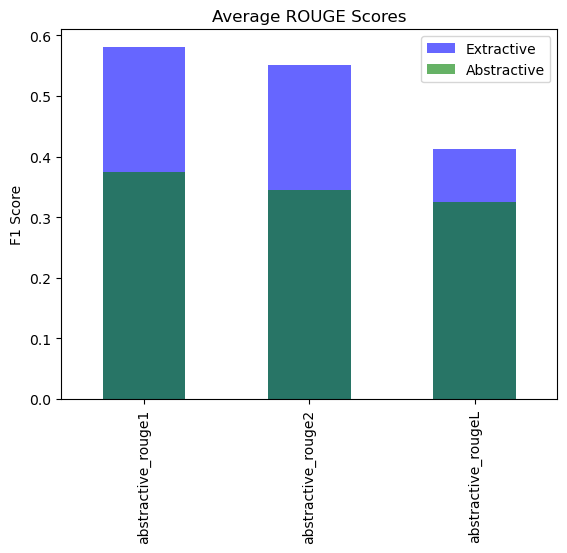

In [ ]:
avg_extractive = evaluated_df[["extractive_rouge1", "extractive_rouge2", "extractive_rougeL"]].mean()
avg_abstractive = evaluated_df[["abstractive_rouge1", "abstractive_rouge2", "abstractive_rougeL"]].mean()

fig, ax = plt.subplots()
avg_extractive.plot(kind="bar", color="blue", alpha=0.6, label="Extractive", ax=ax)
avg_abstractive.plot(kind="bar", color="green", alpha=0.6, label="Abstractive", ax=ax)

plt.title("Average ROUGE Scores")
plt.ylabel("F1 Score")
plt.legend()
plt.show()


In [ ]:
evaluated_df.to_csv("evaluated_summaries_with_rouge.csv", index=False)

In [ ]:
run_email_summarizer_gui()
